## Bootstrap modelling of zircon age distributions

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob
import os as os
import ot
from scipy.stats import skew
import seaborn as sb
import geochron as geochron
from scipy.stats import ks_2samp
import math
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import colors
from matplotlib import cm
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
import matplotlib.patheffects as pe
import warnings
np.random.seed(0) # Set seed
pca_W2_data = geochron.generate_pca_scores()

## 1. Different number of sampled zircon dates

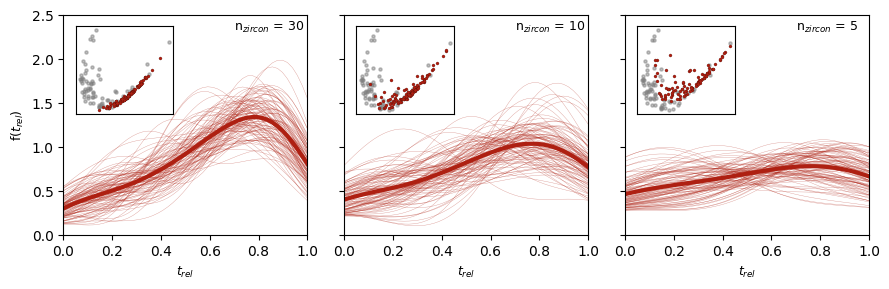

In [4]:
fig, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)
n_zircons = [30, 10, 5]

for ax, n_zircon in enumerate(n_zircons):
    # Perform bootstrap modelling
    bootstrap = geochron.bootstrap_sampling(age = 10, n_zircon = n_zircon, distribution = 'MELTS', n_simulations = 100, truncation = 1.0, 
                                   method = 'ID-TIMS', n_inh = 0, dx = 0)

    # Calculate kdes and W2 distance and PC scores for plotting
    pc_scores = np.zeros((100,2)) # Initiate numpy array to store PC scores
    ys = []
    for simulation,i in enumerate(bootstrap):
        x, y = geochron.plot_kde(i, normalize = True)
        axs[ax].plot(x,y, color = (174/255, 32/255, 18/255), alpha = 0.5, linewidth = 0.25)
        pc_scores[simulation] = geochron.calc_W_PCA(i, check = False)
        ys.append(y)

    # Plot average of kdes
    sb.lineplot(x=x, y=np.mean(ys, axis = 0), linewidth = 3, color = (174/255, 32/255, 18/255), ax = axs[ax])
    
     # Generate inset plot for PC scores
    ins = axs[ax].inset_axes([0.05,0.55,0.4,0.4])
    ins.scatter(pca_W2_data['PC1'], pca_W2_data['PC2'], alpha = 0.5, color = 'gray', s = 5)
    ins.set_xticks([])
    ins.set_yticks([])
    ins.scatter(pc_scores[:,0], pc_scores[:,1], color = (174/255, 32/255, 18/255), s = 5, edgecolor = 'black',
                linewidth = 0.1, marker = 'o')

    # Label and organise the plots
    axs[ax].set_xlim([0,1])
    axs[ax].set_ylim([0,2.5])
    axs[ax].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    axs[ax].set_xlabel('$t_{rel}$', fontsize = 9)
    # ax.plot(np.arange(len(melts_dist))/100, melts_dist.iloc[::-1], color = line_color, linewidth = 3)
    axs[ax].annotate(text = 'n$_{zircon}$ = %s' % n_zircon, xy = (0.70, 0.93), xycoords = 'axes fraction', fontsize = 9)


axs[0].set_ylabel('f($t_{rel}$)', fontsize = 9)

plt.tight_layout()
plt.show()

## 2. Different values of truncation of an age distribution

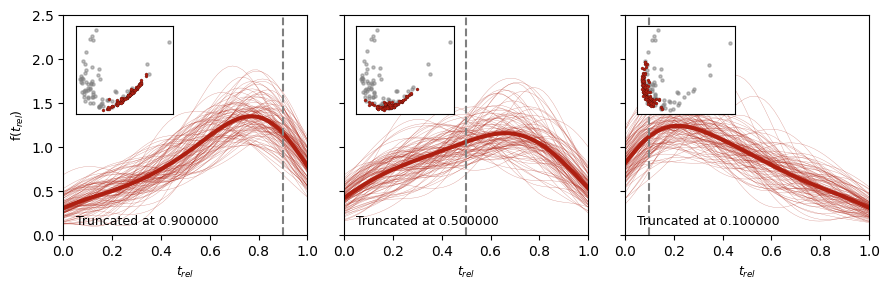

In [5]:
fig, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)
truncations = [0.9, 0.5, 0.1]

for ax, truncation in enumerate(truncations):
    # Perform bootstrap modelling
    bootstrap = geochron.bootstrap_sampling(age = 10, n_zircon = 30, distribution = 'MELTS', n_simulations = 100, truncation = truncation, 
                                   method = 'ID-TIMS', n_inh = 0, dx = 0)
    
    # Calculate kdes and W2 distance and PC scores for plotting
    ys = []
    pc_scores = np.zeros((100,2)) # Initiate numpy array to store PC scores
    for simulation,i in enumerate(bootstrap):
        x, y = geochron.plot_kde(i, normalize = True)
        axs[ax].plot(x,y, color = (174/255, 32/255, 18/255), alpha = 0.5, linewidth = 0.25)
        pc_scores[simulation] = geochron.calc_W_PCA(i, check = False)
        ys.append(y)

    # Plot average of kdes
    sb.lineplot(x=x, y=np.mean(ys, axis = 0), linewidth = 3, color = (174/255, 32/255, 18/255), ax = axs[ax])
    # Generate inset plot for PC scores
    ins = axs[ax].inset_axes([0.05,0.55,0.4,0.4])
    ins.scatter(pca_W2_data['PC1'], pca_W2_data['PC2'], alpha = 0.5, color = 'gray', s = 5)
    ins.set_xticks([])
    ins.set_yticks([])
    ins.scatter(pc_scores[:,0], pc_scores[:,1], color = (174/255, 32/255, 18/255), s = 5, edgecolor = 'black',
                linewidth = 0.1, marker = 'o')

    # Label and organise the plots
    axs[ax].set_xlim([0,1])
    axs[ax].set_ylim([0,2.5])
    axs[ax].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    axs[ax].set_xlabel('$t_{rel}$', fontsize = 9)
    axs[ax].annotate('Truncated at %1f' % truncation, xy = (0.05, 0.05), xycoords = 'axes fraction', fontsize = 9)
    axs[ax].vlines(x=truncation, ymin=0, ymax=2.5, color = 'gray', linestyle = 'dashed')

axs[0].set_ylabel('f($t_{rel}$)', fontsize = 9)

plt.tight_layout()
plt.show()

## 3. Different underlying age distributions generated with varying magma recharge

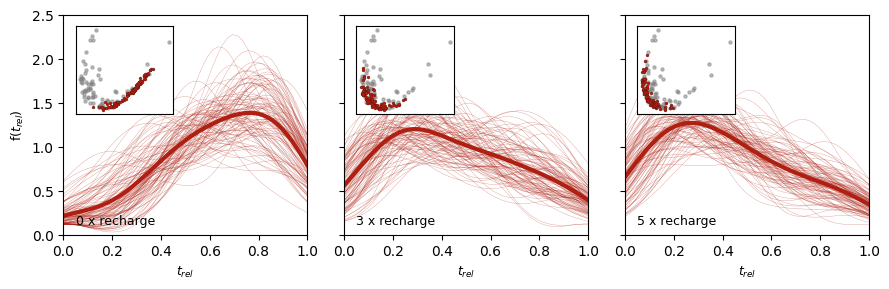

In [6]:
fig, axs = plt.subplots(1,3, figsize = (9,3), sharey = True)
distributions = [0,8,10]

for ax, distribution in enumerate(distributions):
    # Perform bootstrap modelling
    bootstrap = geochron.bootstrap_sampling(age = 10, n_zircon = 30, distribution = distribution, n_simulations = 100, truncation = 1.0, 
                                   method = 'ID-TIMS', n_inh = 0, dx = 0)
    
    # Calculate kdes and W2 distance and PC scores for plotting
    ys = []
    pc_scores = np.zeros((100,2)) # Initiate numpy array to store PC scores
    for simulation,i in enumerate(bootstrap):
        x, y = geochron.plot_kde(i, normalize = True)
        axs[ax].plot(x,y, color = (174/255, 32/255, 18/255), alpha = 0.5, linewidth = 0.25)
        pc_scores[simulation] = geochron.calc_W_PCA(i, check = False)
        ys.append(y)

    # Plot average of kdes
    sb.lineplot(x=x, y=np.mean(ys, axis = 0), linewidth = 3, color = (174/255, 32/255, 18/255), ax = axs[ax])
    # Generate inset plot for PC scores
    ins = axs[ax].inset_axes([0.05,0.55,0.4,0.4])
    ins.scatter(pca_W2_data['PC1'], pca_W2_data['PC2'], alpha = 0.5, color = 'gray', s = 5)
    ins.set_xticks([])
    ins.set_yticks([])
    ins.scatter(pc_scores[:,0], pc_scores[:,1], color = (174/255, 32/255, 18/255), s = 5, edgecolor = 'black',
                linewidth = 0.1, marker = 'o')

    # Label and organise the plots
    axs[ax].set_xlim([0,1])
    axs[ax].set_ylim([0,2.5])
    axs[ax].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    axs[ax].set_xlabel('$t_{rel}$', fontsize = 9)
    
axs[0].annotate('0 x recharge', xy = (0.05, 0.05), xycoords = 'axes fraction', fontsize = 9)
axs[1].annotate('3 x recharge', xy = (0.05, 0.05), xycoords = 'axes fraction', fontsize = 9)
axs[2].annotate('5 x recharge', xy = (0.05, 0.05), xycoords = 'axes fraction', fontsize = 9)

axs[0].set_ylabel('f($t_{rel}$)', fontsize = 9)

plt.tight_layout()
plt.show()

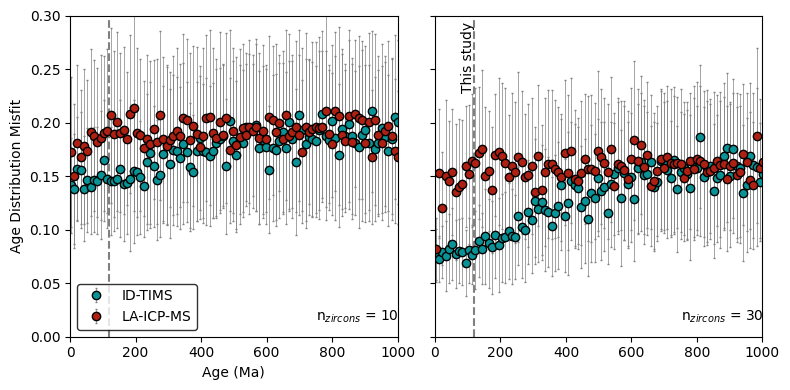

In [3]:
fig, axs = plt.subplots(1,2, figsize = (8,4), sharey = True)
colors = [(10/255, 147/255, 150/255),(174/255, 32/255, 18/255),(238/255, 155/255, 0/255)]

ages = np.linspace(0.1, 1000, 100)
avg_misfits = np.zeros(len(ages))
std_misfits = np.zeros(len(ages))

for n, age in enumerate(ages):
    avg_misfits[n], std_misfits[n] = geochron.bootstrap_sampling_misfit(age = age, n_zircon = 10, n_simulations = 100, distribution = 'MELTS', method = 'ID-TIMS', truncation = 1.0, n_inh = 0, dx = 1)

axs[0].errorbar(ages+2.5, avg_misfits, yerr = std_misfits, ecolor = 'gray', mfc = colors[0], marker = 'o', capsize = 1, 
            linewidth = 0.5, markeredgecolor = 'black',linestyle = 'none', label = 'ID-TIMS')

for n, age in enumerate(ages):
    avg_misfits[n], std_misfits[n] = geochron.bootstrap_sampling_misfit(age = age, n_zircon = 10, n_simulations = 100, distribution = 'MELTS', method = 'LA-ICP-MS', truncation = 1.0, n_inh = 0, dx = 1)

axs[0].errorbar(ages+2.5, avg_misfits, yerr = std_misfits, ecolor = 'gray', mfc = colors[1], marker = 'o', capsize = 1, 
            linewidth = 0.5, markeredgecolor = 'black',linestyle = 'none', label = 'LA-ICP-MS')

for n, age in enumerate(ages):
    avg_misfits[n], std_misfits[n] = geochron.bootstrap_sampling_misfit(age = age, n_zircon = 30, n_simulations = 100, distribution = 'MELTS', method = 'ID-TIMS', truncation = 1.0, n_inh = 0, dx = 1)

axs[1].errorbar(ages+2.5, avg_misfits, yerr = std_misfits, ecolor = 'gray', mfc = colors[0], marker = 'o', capsize = 1, 
            linewidth = 0.5, markeredgecolor = 'black',linestyle = 'none', label = 'ID-TIMS')

for n, age in enumerate(ages):
    avg_misfits[n], std_misfits[n] = geochron.bootstrap_sampling_misfit(age = age, n_zircon = 30, n_simulations = 100, distribution = 'MELTS', method = 'LA-ICP-MS', truncation = 1.0, n_inh = 0, dx = 1)

axs[1].errorbar(ages+2.5, avg_misfits, yerr = std_misfits, ecolor = 'gray', mfc = colors[1], marker = 'o', capsize = 1, 
            linewidth = 0.5, markeredgecolor = 'black',linestyle = 'none', label = 'LA-ICP-MS')

axs[0].set_ylim([0,0.3])
axs[0].set_xlabel('Age (Ma)')
axs[0].set_ylabel('Age Distribution Misfit')
axs[0].set_xlim([0,1000])
axs[1].set_xlim([0,1000])
axs[0].legend(facecolor = 'white', edgecolor = 'black')
axs[0].vlines(x = 120, ymin = 0, ymax = 0.3, color = 'gray', linestyle = 'dashed')
axs[1].vlines(x = 120, ymin = 0, ymax = 0.3, color = 'gray', linestyle = 'dashed')
axs[1].annotate('This study', (80,0.23), rotation = 90)
axs[0].annotate('n$_{zircons}$ = 10', (0.75,0.05), xycoords = 'axes fraction')
axs[1].annotate('n$_{zircons}$ = 30', (0.75,0.05), xycoords = 'axes fraction')


plt.tight_layout()
plt.show()